<a href="https://colab.research.google.com/github/clwilkinson7/Temp/blob/main/Week_3_Clustering_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 3 - KMeans Clustering

---


Week beginning 07/10/2024

Imports

In [2]:
from google.colab import files

from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import csv
import random
from random import randint

Opening CSV file


> Using basic file opening methods



Creating lists to store the data in


> Manually creating a list for relevant columns in the CSV file


In [3]:
files.upload()
houseprice = open("housePrice.csv", "r")

file = csv.DictReader(houseprice)

price = []
beds = []
bathrooms = []

Saving housePrice.csv to housePrice.csv


Using a for loop to iterate through all relevant columns in the CSV file I appended every item in each column to the assotiated  list, whilst adding values of 0 in place of empty data

In [4]:
count = 0
for col in file:
    if "$" in col["Price"]:
        if "/mo" not in col["Price"]:
            price.append(col["Price"])
        else:
            price.append("0$,+")
    else:
        price.append("0$,+")

    if col["Beds"] != "":
        beds.append((float(col["Beds"])))
    else:
        beds.append(0)

    if col["Bath"] != "":
        bathrooms.append(float((col["Bath"])))
    else:
        bathrooms.append(0)
    count+= 1

This for loop is to manage all the uncessary data in the price list

In [5]:
issues = ["$", ",", "+"]

count = 0
for value in price:
    for issue in issues:
        value = value.replace(issue, "")
    price[count] = float(value)
    count += 1

For plotting the data I set the y-axis to the highest value in the beds list and for the x-axis I placed the highest in the bathroom list

In [6]:
xAxis = max(bathrooms)
yAxis = max(beds)

The generate the plot points

In [7]:
data = list(zip(beds, bathrooms))

To generate a diagram to visulise the inertia of the data to know how many clusters are needed

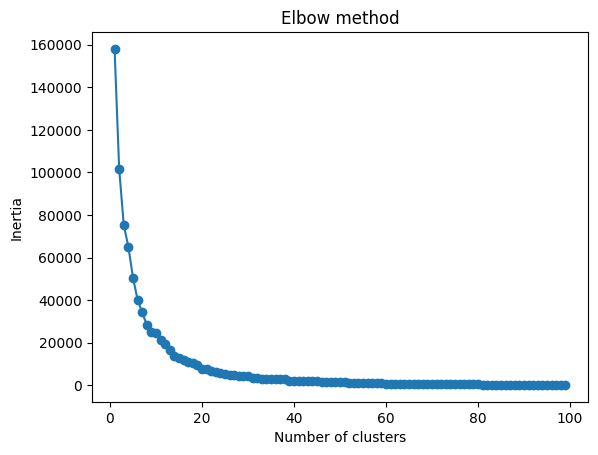

In [8]:
inertias = []

for i in range(1, 100):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1, 100), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

To plot the data with a different colour for each cluster

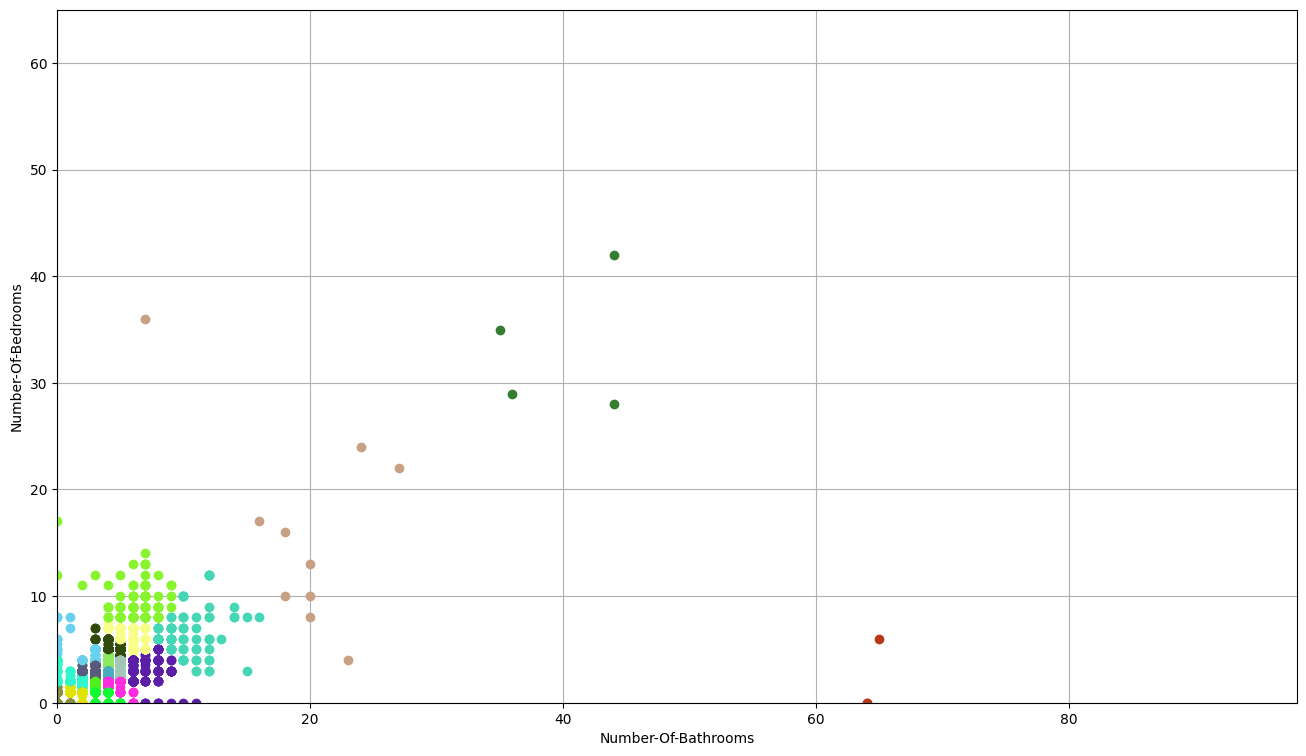

In [9]:
kmeans = KMeans(n_clusters=20)
kmeans.fit(data)

numberOfColours = 20

colours = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for i in range(numberOfColours)]


plt.figure(figsize=(16, 9))
count = 0
for X,Y in data:
    plt.plot(X, Y, c=colours[kmeans.labels_[count]], marker="o")
    count += 1
plt.xlabel("Number-Of-Bathrooms")
plt.ylabel("Number-Of-Bedrooms", rotation=90)
plt.axis([0, xAxis, 0, yAxis])
plt.grid()
plt.show()